# ANALYSIS OF INDIAN BUDGET SPEECHES

### Importing header files

In [1]:
# Header Files

import PyPDF2
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
import requests
import geopandas



### Scraping the budget speeches

In [2]:
temp_url='https://www.indiabudget.gov.in/doc/bspeech/bs' # Common URL part

for i in range(2000,2019):
    add_text=str(i) + str(i+1)[2:] +".pdf"
    url= temp_url + add_text

    page = requests.get(url) # to get url
    
    name = url.split('/')[-1] # to get filename
    f = open("../Data/budget_speeches/" + name,'wb')  # making a file object
    
    f.write(page.content) # writing data
    f.close() 

### Reading the pdf files and combining them for analysis

In [3]:
full_text= ""

for i in range(0,19):
    
    
    
    
    if i==8 or i==9 or i==10 :   # Files of 2008,2009 and 2010 are corrupted
        continue
        
    
    if i<8:
        reader = PyPDF2.PdfFileReader("../Data/budget_speeches/bs200"+ str(i) + "0" + str(i+1)+ ".pdf")
 
    else: 
        reader = PyPDF2.PdfFileReader("../Data/budget_speeches/bs20"+ str(i) + str(i+1)+ ".pdf")
    
    numPages=reader.getNumPages()
    
    for i in range(numPages):
        page_text= reader.getPage(i).extractText().strip()  # Extracting text from each page
        full_text +=page_text.replace("\n", "")     # Combining text of each page
        
full_text=full_text.lower()

### Tokenizing and removing stop words

In [4]:
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(full_text)  # Tokenizing the combined speech text
   
filtered_sentence = [w for w in word_tokens if not w in stop_words]  # Removing stopwords

full_t=' '.join(filtered_sentence)  # Combining the tokens back into combined text

### Word Cloud Analysis

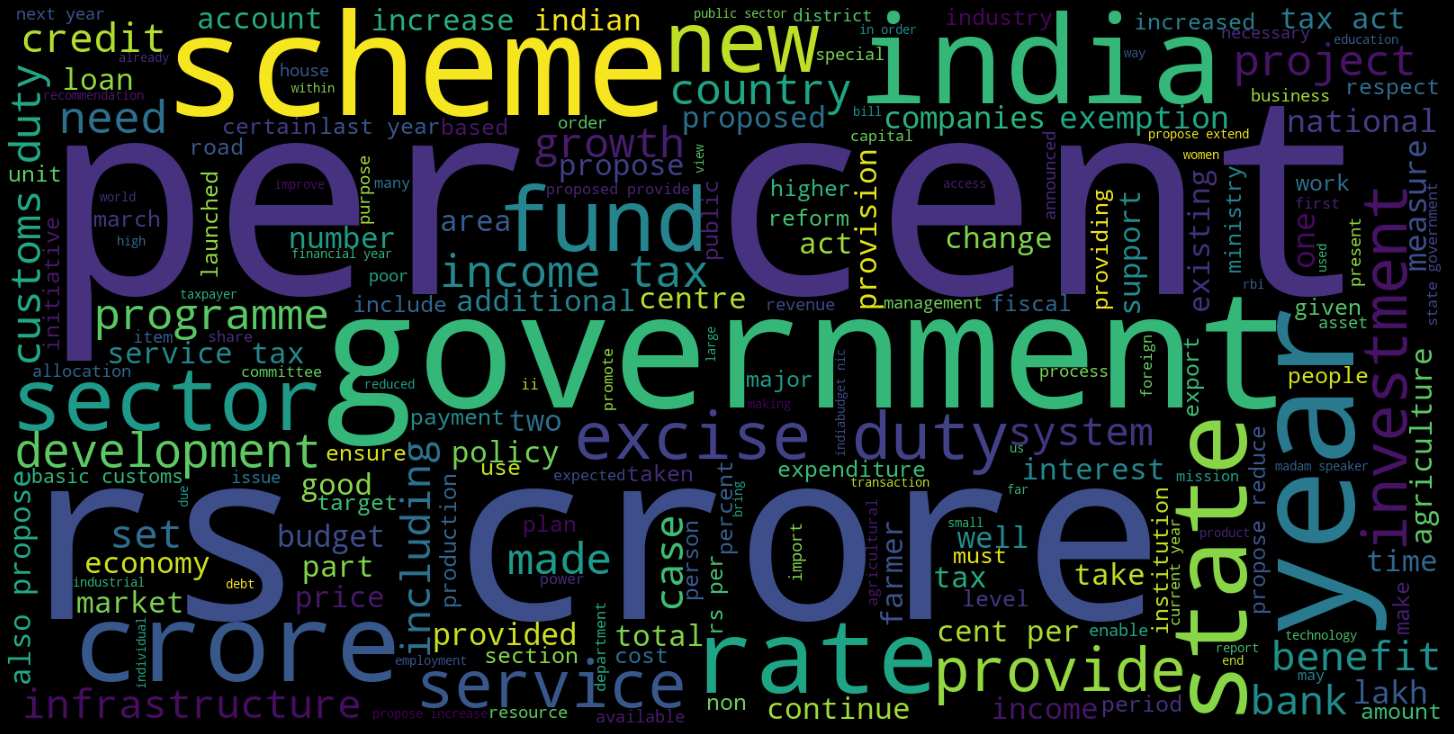

In [5]:
wordcloud = WordCloud(width=1600, height=800).generate(full_t)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


plt.savefig('../Data/graphs/WordCloud.png', bbox_inches='tight')
plt.show()


Frequency of key words used in the Budget speeches gives a broad idea of the shifting priorities in economic policy through theÂ decades. Unsurprisingly, there are multiple occurrences of words like government, scheme, India and crore. However there are also a lot of mentions of development, employment, rural,livelihood(An indicator perhaps that India is in fact still is a developing country?)Another exciting application of this would be to compare it with other countries budget word frequencies(For eg. [Australia](https://www.abc.net.au/news/specials/federal-budget-2012/2012-05-15/budget-talk-most-used-words-in-budget-speeches/4011824)) to understand the preferences.

### State Wise Budget Mentions

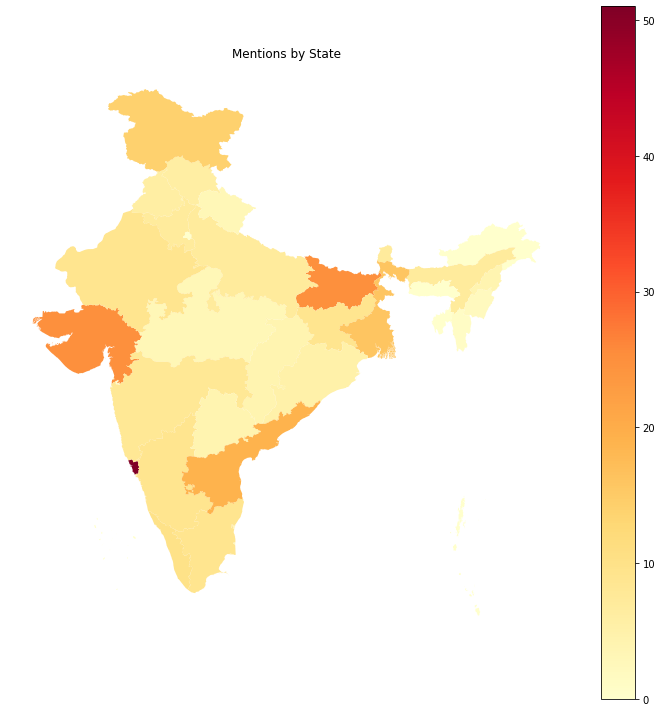

In [6]:

# Loading shapes files for Indian states
india_df = geopandas.read_file("../Data/india_shape_files")
ind_states=india_df['st_nm'].unique()

for state in ind_states:
    # We insert the count value into the row with the matching state name.
    india_df.loc[india_df["st_nm"] == state,
                    "count"] = full_t.count(state.lower())
    
    
fig, ax = plt.subplots(1, figsize=(10, 10))

india_df.plot(column="count", cmap="YlOrRd", legend=True,ax=ax)

plt.title("Mentions by State")
plt.axis("off")
plt.tight_layout()
plt.savefig("../Data/graphs/state_mentions.png",dpi=300)    

Goa, Gujarat, Andhra Pradesh and Bihar are the most mentioned states, whereas the northeastern states are among the least mentioned. This leads to very interesting questions of state preference in budget allocation(Are states allocated more funds for votes?Are states which are being allocated less being very well managed in terms of funding?)